In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def make_data(sigma, n, m):
    X = np.random.random((n, m+1))
    X[:, 0] = 1
    beta = np.random.random((m+1, 1))
    e = np.random.normal(scale=sigma, size=(n, 1))
    return X, X @ beta + e, beta

In [117]:
def linear_regression(X, Y, k, tau, alpha=0.001):
    def cost_function(X, beta_guess, Y):
        errors = X@beta_guess - Y
        return np.linalg.norm(errors) 
    
    def gradient(X, beta_guess, Y):
        return X.T @ (X@beta_guess - Y)
        
    beta_guess = np.random.random((X.shape[1], 1))
    costs = np.full(k, 0.)
    for i in range(0, k):
        beta_guess -= gradient(X, beta_guess, Y) * alpha
        costs[i] = cost_function(X, beta_guess, Y)
        if i>0 and costs[i-1] - costs[i] < tau:
            break
    return beta_guess, costs

In [118]:
def scan_sigma(average_over):
    ss = np.arange(0, 0.1, 0.001)
    s_costs = np.zeros(ss.size)
    beta_norm = np.zeros(ss.size)
    for i in range(len(ss)):
        for k in range(average_over):
            X, Y, bs = make_data(ss[i], 50, 5)
            b, costs = linear_regression(X, Y, 50, 0.0001)
            s_costs[i] += costs[-1]
            beta_norm[i] += np.linalg.norm(b-bs) / 50
        s_costs[i] /= average_over
        beta_norm[i] /= average_over
    return ss, s_costs, beta_norm

In [119]:
ss, s_costs, beta_norm = scan_sigma(1000)

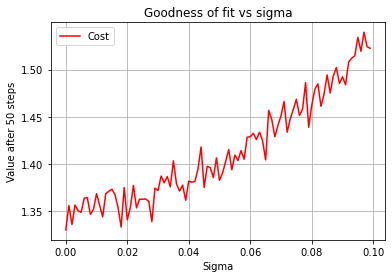

In [120]:
plt.plot(ss, s_costs, "r", label="Cost")
plt.title("Goodness of fit vs sigma")
plt.xlabel("Sigma")
plt.ylabel("Value after 50 steps")
plt.legend()
plt.grid()

In [14]:
def scan_n(average_over):
    ns = np.arange(1, 100)
    n_costs = np.zeros(ns.size)
    beta_norm = np.zeros(ns.size)
    for i in range(len(ns)):
        for k in range(average_over):
            X, Y, bstar = make_data(0.04, ns[i], 5)
            b, costs = linear_regression(X, Y, 50, 0.0001)
            n_costs[i] += costs[-1]
            beta_norm[i] += np.linalg.norm(b-bstar) / ns[i]
        n_costs[i] /= average_over
        beta_norm[i] /= average_over
    return ns, n_costs, beta_norm

In [15]:
ns, n_costs, beta_norm = scan_n(100)

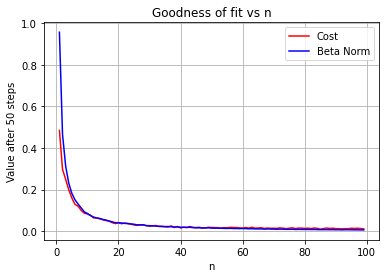

In [16]:
plt.plot(ns, n_costs, "r", label="Cost")
plt.plot(ns, beta_norm, "b", label="Beta Norm")
plt.title("Goodness of fit vs n")
plt.xlabel("n")
plt.ylabel("Value after 50 steps")
plt.legend()
plt.grid()